## **PLANTEAMIENTO**

### The price for the good diamond depends on 4 variables: cut, color, clarity and table (carat width) how three of four are categories so we have to give to the dataframe another information about for example clarity, it's same the light (from table and depth) and another is volume from x, y and z.

#### Aquí encontrarás todo lo que necesitas saber: https://www.kaggle.com/c/diamonds-data-ft-nov-2020/data 

In [3]:
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
# la otra forma, pero con mismo resultado: from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore', category=DeprecationWarning)
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
# evaluate random forest algorithm for classification
#from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold, RepeatedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold
#from xgboost import XGBClassifier
#from sklearn.model_selection import GridSearchCV
#from sklearn.pipeline import Pipeline
from sklearn import svm

In [50]:
### para que funcione necesitas bajarte los archivos de datos de Kaggle :) 
df = pd.read_csv("data/diamonds_train.csv")
df

,Unnamed: 0,carat,cut,color,clarity,depth,table,x,y,z,price
0,0,1.21,Ideal,H,VS2,63.0,57.0,6.73,6.70,4.23,6134
1,1,0.28,Very Good,D,VVS2,64.0,56.0,4.14,4.17,2.66,532
2,2,0.42,Premium,F,VS1,61.2,58.0,4.86,4.82,2.96,1103
3,3,0.26,Ideal,H,IF,61.1,57.0,4.16,4.12,2.53,600
4,4,1.10,Good,G,SI1,63.4,57.0,6.52,6.55,4.14,4997
...,...,...,...,...,...,...,...,...,...,...,...
40340,40340,1.55,Premium,H,VS2,61.3,61.0,7.46,7.39,4.55,11708
40341,40341,0.36,Ideal,D,SI1,60.6,56.0,4.58,4.63,2.79,619
40342,40342,0.57,Very Good,I,VS2,62.2,55.0,5.33,5.34,3.32,1267
40343,40343,1.01,Very Good,F,IF,59.6,62.0,6.47,6.56,3.88,9965


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40345 entries, 0 to 40344
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    40345 non-null  float64
 1   cut      40345 non-null  object 
 2   color    40345 non-null  object 
 3   clarity  40345 non-null  object 
 4   depth    40345 non-null  float64
 5   table    40345 non-null  float64
 6   x        40345 non-null  float64
 7   y        40345 non-null  float64
 8   z        40345 non-null  float64
 9   price    40345 non-null  int64  
dtypes: float64(6), int64(1), object(3)
memory usage: 3.1+ MB


In [51]:
df.columns

Index(['Unnamed: 0', 'carat', 'cut', 'color', 'clarity', 'depth', 'table', 'x',
       'y', 'z', 'price'],
      dtype='object')

In [5]:
df["cut"].value_counts()

Ideal        16090
Premium      10339
Very Good     9036
Good          3694
Fair          1186
Name: cut, dtype: int64

In [20]:
#it's showing median about depth respect cut, it is not correlation because the fair diamond has a better depth than Premium or Ideal diamond
df.groupby("cut").median()

,carat,depth,table,x,y,z,price
cut,,,,,,,
Fair,1.00,65.0,58.0,6.19,6.12,3.98,3288.0
Good,0.80,63.4,58.0,5.97,5.97,3.69,3025.5
Ideal,0.54,61.8,56.0,5.25,5.26,3.23,1813.5
Premium,0.86,61.5,59.0,6.11,6.05,3.71,3161.0
Very Good,0.71,62.1,58.0,5.73,5.76,3.56,2610.5


In [7]:
df["color"].value_counts()

G    8499
E    7351
F    7130
H    6234
D    5074
I    4023
J    2034
Name: color, dtype: int64

In [21]:
#incolor diamond, the price is higher
df.groupby("color").median()

,carat,depth,table,x,y,z,price
color,,,,,,,
D,0.54,61.8,57.0,5.240,5.25,3.23,1857.0
E,0.53,61.8,57.0,5.240,5.24,3.22,1746.0
F,0.70,61.8,57.0,5.650,5.65,3.48,2345.5
G,0.70,61.8,57.0,5.610,5.60,3.46,2208.0
H,0.90,61.9,57.0,6.140,6.13,3.81,3415.5
I,1.00,61.9,57.0,6.350,6.34,3.93,3696.0
J,1.11,62.0,58.0,6.635,6.63,4.10,4214.5


In [9]:
df["clarity"].value_counts()

SI1     9751
VS2     9178
SI2     6828
VS1     6101
VVS2    3858
VVS1    2714
IF      1362
I1       553
Name: clarity, dtype: int64

In [22]:
#when is less clarity is due of a little bit inside light then the price is lower
df.groupby("clarity").median()

,carat,depth,table,x,y,z,price
clarity,,,,,,,
I1,1.10,62.3,58.0,6.620,6.58,4.09,3234.0
IF,0.35,61.7,56.0,4.560,4.58,2.80,1063.5
SI1,0.76,62.0,57.0,5.870,5.88,3.63,2830.0
SI2,1.01,61.9,58.0,6.410,6.41,3.97,4064.5
VS1,0.57,61.8,57.0,5.350,5.36,3.29,1994.0
VS2,0.63,61.8,57.0,5.510,5.51,3.38,2056.0
VVS1,0.39,61.7,57.0,4.690,4.71,2.90,1095.5
VVS2,0.44,61.7,57.0,4.905,4.91,3.01,1323.0


In [52]:
#I add one column about volume:
df["volume"] = df["x"] * df["y"] * df["z"]
df["volume"]

0        190.734930
1         45.921708
2         69.338592
3         43.362176
4        176.802840
            ...    
40340    250.838770
40341     59.163066
40342     94.494504
40343    164.679616
40344     89.885120
Name: volume, Length: 40345, dtype: float64

In [53]:
df

,Unnamed: 0,carat,cut,color,clarity,depth,table,x,y,z,price,volume
0,0,1.21,Ideal,H,VS2,63.0,57.0,6.73,6.70,4.23,6134,190.734930
1,1,0.28,Very Good,D,VVS2,64.0,56.0,4.14,4.17,2.66,532,45.921708
2,2,0.42,Premium,F,VS1,61.2,58.0,4.86,4.82,2.96,1103,69.338592
3,3,0.26,Ideal,H,IF,61.1,57.0,4.16,4.12,2.53,600,43.362176
4,4,1.10,Good,G,SI1,63.4,57.0,6.52,6.55,4.14,4997,176.802840
...,...,...,...,...,...,...,...,...,...,...,...,...
40340,40340,1.55,Premium,H,VS2,61.3,61.0,7.46,7.39,4.55,11708,250.838770
40341,40341,0.36,Ideal,D,SI1,60.6,56.0,4.58,4.63,2.79,619,59.163066
40342,40342,0.57,Very Good,I,VS2,62.2,55.0,5.33,5.34,3.32,1267,94.494504
40343,40343,1.01,Very Good,F,IF,59.6,62.0,6.47,6.56,3.88,9965,164.679616


In [54]:
#Encoding 3 categories columns with personalize each encode

df['label_cut'] = df['cut'].map({'Ideal':1,'Good':2,'Very Good':3,'Fair':4,'Premium':5})
df['label_color'] = df['color'].map({'E':7,'D':6,'F':5,'G':4,'H':3,'I':2,'J':1})
df['label_clarity'] = df['clarity'].map({'VVS1':7,'IF':8,'VVS2':6,'VS1':5,'I1':1,'VS2':4,'SI1':3,'SI2':2})
df

,Unnamed: 0,carat,cut,color,clarity,depth,table,x,y,z,price,volume,label_cut,label_color,label_clarity
0,0,1.21,Ideal,H,VS2,63.0,57.0,6.73,6.70,4.23,6134,190.734930,1,3,4
1,1,0.28,Very Good,D,VVS2,64.0,56.0,4.14,4.17,2.66,532,45.921708,3,6,6
2,2,0.42,Premium,F,VS1,61.2,58.0,4.86,4.82,2.96,1103,69.338592,5,5,5
3,3,0.26,Ideal,H,IF,61.1,57.0,4.16,4.12,2.53,600,43.362176,1,3,8
4,4,1.10,Good,G,SI1,63.4,57.0,6.52,6.55,4.14,4997,176.802840,2,4,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40340,40340,1.55,Premium,H,VS2,61.3,61.0,7.46,7.39,4.55,11708,250.838770,5,3,4
40341,40341,0.36,Ideal,D,SI1,60.6,56.0,4.58,4.63,2.79,619,59.163066,1,6,3
40342,40342,0.57,Very Good,I,VS2,62.2,55.0,5.33,5.34,3.32,1267,94.494504,3,2,4
40343,40343,1.01,Very Good,F,IF,59.6,62.0,6.47,6.56,3.88,9965,164.679616,3,5,8


<AxesSubplot:>

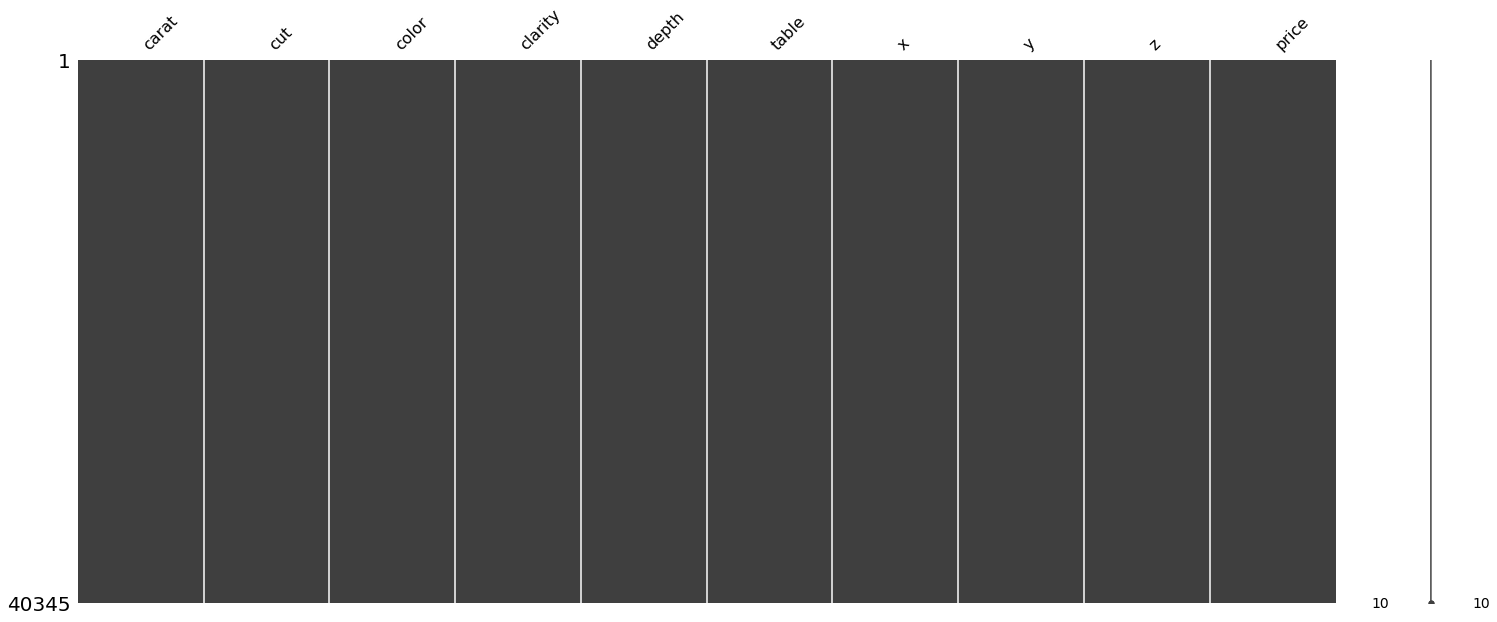

In [11]:
import missingno as msno
#any NAN, I have not delete any value
msno.matrix(df)

<AxesSubplot:>

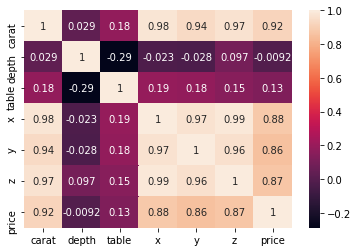

In [12]:
#Exits a strongly positive correlation between caract with x=length, y=width e z=depth (masa). After, there is a lightly positive correlation between table= width of top of diamond realtio widest point and price and caract. 
sns.heatmap(df.corr(), annot = True)

#### 1. Definir X e y -- Usaremos solo las variables numéricas para entrenar un primera fase.

In [55]:
X = np.array(df[['Unnamed: 0', 'carat', 'depth', 'table', 'x', 'y', 'z', "volume", "label_cut", "label_color", "label_clarity"]])
y = np.array(df['price'])
X.shape

(40345, 11)

In [27]:
y.shape

(40345,)

#### 2. Dividir X_train, X_test, y_train, y_test -- Usaremos solo las variables numéricas para entrenar un primera fase.

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [29]:
X_train

array([[ 1.09, 63.8 , 57.  , ...,  3.  ,  2.  ,  2.  ],
       [ 0.58, 61.8 , 56.  , ...,  3.  ,  3.  ,  3.  ],
       [ 0.32, 61.4 , 58.  , ...,  5.  ,  3.  ,  7.  ],
       ...,
       [ 0.83, 61.6 , 58.  , ...,  3.  ,  2.  ,  4.  ],
       [ 1.04, 61.2 , 57.  , ...,  1.  ,  5.  ,  6.  ],
       [ 1.09, 62.7 , 58.  , ...,  5.  ,  5.  ,  3.  ]])

In [57]:
"""GANADOR HA SIDO MODELO TREE REGRESSOR SIN PODER APLICAR LOGISTIC REGRESSION"""

model = DecisionTreeRegressor(random_state = 100)
model.fit(X_train, y_train)

DecisionTreeRegressor(random_state=100)

In [58]:
#Predict
predictions = model.predict(X_test)

In [59]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))
print('Score Train', model.score(X_train, y_train) * 100)
print('Score Test', model.score(X_test, y_test) * 100)

MAE: 371.2548023299046
RMSE: 751.4493697420081
Score Train 100.0
Score Test 96.44598429953614


In [33]:
model2 = svm.SVR(kernel="rbf", degree=2)
model2.fit(X_train, y_train)
predictions2 = model2.predict(X_test)

In [34]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions2))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions2)))
print('Score Train', model2.score(X_train, y_train) * 100)
print('Score Test', model2.score(X_test, y_test) * 100)

MAE: 1138.0442801854679
RMSE: 2361.2973589036064
Score Train 65.363314983455
Score Test 64.90693864476623


In [35]:
#Ha sido imposible en run este modelo... :((
model3 = LogisticRegression(random_state=8)
model3.fit(X_train, y_train)
predictions3 = model3.predict(X_test)

KeyboardInterrupt: 

In [ ]:
"""
print('MAE:', metrics.mean_absolute_error(y_test, predictions3))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions3)))
print('Score Train', model3.score(X_train, y_train) * 100)
print('Score Test', model3.score(X_test, y_test) * 100)
"""

##**I NEED TO USE GRIDSEARCH** -- Al final no he podido usarlo porque necesito mucha más memoria de la que tengo

In [11]:
#Definimos los degrees:
#to_test = np.arange(1, 10)
# Create a pipeline

# Le podemos poner cualquier clasificador. Irá cambiando según va probando pero necesita 1.
#pipe = Pipeline(steps=[('classifier', svm.SVC())])

"""
logistic_params = {
    'classifier': [LogisticRegression()],
    'classifier__penalty': ['l1', 'l2'],
    'classifier__C': np.logspace(0, 4, 10)
    }

svm_params = {
    'classifier': [svm.SVC()],
    'classifier__kernel':('linear', 'rbf', 'sigmoid'), 
    'classifier__C':[0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9], 
    'classifier__degree': to_test,
    'classifier__coef0': [-10.,-1., 0., 0.1, 0.5, 1, 10, 100],
    'classifier__gamma': ('scale', 'auto')
    }

# hypertuning 
# Create space of candidate learning algorithms and their hyperparameters
search_space = [
    logistic_params,
    svm_params
    ]

In [ ]:
"""
cv = RepeatedKFold(n_splits=100, n_repeats=1, random_state=2)
# Create grid search 
#clf = GridSearchCV(estimator=pipe, param_grid=search_space, cv=cv, verbose=0, n_jobs=-1)

# Fit grid search
best_model = clf.fit(X_train, y_train)

#Predict
predictions = model.predict(X_test)"""

"""# View best model
separator = "\n############################\n"
print(separator)
print("best estimator:", model.best_estimator_.get_params()['classifier'])
print(separator)
print("clf.best_params_", clf.best_params_)
print(separator)
# Mean cross-validated score of the best_estimator
print("clf.best_score", clf.best_score_)"""

## Una vez listo el modelo, toca predecir con el dataset de predicción 

In [60]:
to_pred = pd.read_csv("data/diamonds_test.csv")
to_pred

,Unnamed: 0,carat,cut,color,clarity,depth,table,x,y,z
0,0,0.30,Ideal,H,SI2,60.0,56.0,4.41,4.43,2.65
1,1,0.34,Ideal,D,IF,62.1,57.0,4.52,4.46,2.79
2,2,1.57,Very Good,I,VS2,60.3,58.0,7.58,7.55,4.56
3,3,0.31,Ideal,H,VS2,61.8,57.0,4.32,4.36,2.68
4,4,1.51,Good,I,VVS1,64.0,60.0,7.26,7.21,4.63
...,...,...,...,...,...,...,...,...,...,...
13444,13444,1.05,Ideal,F,SI2,60.3,55.0,6.55,6.68,3.99
13445,13445,0.27,Very Good,G,VS1,61.9,56.0,4.13,4.16,2.56
13446,13446,1.50,Premium,D,VS2,61.8,60.0,7.30,7.37,4.53
13447,13447,1.70,Premium,F,SI2,60.2,61.0,7.79,7.68,4.66


In [61]:
#I add one column about volume:
to_pred["volume"] = to_pred["x"] * to_pred["y"] * to_pred["z"]
to_pred["volume"]

0         51.771195
1         56.244168
2        260.964240
3         50.478336
4        242.355498
            ...    
13444    174.578460
13445     43.982848
13446    243.718530
13447    278.794752
13448     49.153104
Name: volume, Length: 13449, dtype: float64

In [62]:
to_pred['label_cut'] = to_pred['cut'].map({'Ideal':1,'Good':2,'Very Good':3,'Fair':4,'Premium':5})
to_pred['label_color'] = to_pred['color'].map({'E':7,'D':6,'F':5,'G':4,'H':3,'I':2,'J':1})
to_pred['label_clarity'] = to_pred['clarity'].map({'VVS1':7,'IF':8,'VVS2':6,'VS1':5,'I1':1,'VS2':4,'SI1':3,'SI2':2})
to_pred

,Unnamed: 0,carat,cut,color,clarity,depth,table,x,y,z,volume,label_cut,label_color,label_clarity
0,0,0.30,Ideal,H,SI2,60.0,56.0,4.41,4.43,2.65,51.771195,1,3,2
1,1,0.34,Ideal,D,IF,62.1,57.0,4.52,4.46,2.79,56.244168,1,6,8
2,2,1.57,Very Good,I,VS2,60.3,58.0,7.58,7.55,4.56,260.964240,3,2,4
3,3,0.31,Ideal,H,VS2,61.8,57.0,4.32,4.36,2.68,50.478336,1,3,4
4,4,1.51,Good,I,VVS1,64.0,60.0,7.26,7.21,4.63,242.355498,2,2,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13444,13444,1.05,Ideal,F,SI2,60.3,55.0,6.55,6.68,3.99,174.578460,1,5,2
13445,13445,0.27,Very Good,G,VS1,61.9,56.0,4.13,4.16,2.56,43.982848,3,4,5
13446,13446,1.50,Premium,D,VS2,61.8,60.0,7.30,7.37,4.53,243.718530,5,6,4
13447,13447,1.70,Premium,F,SI2,60.2,61.0,7.79,7.68,4.66,278.794752,5,5,2


In [63]:
predictions_submit = model.predict(to_pred[['Unnamed: 0', 'carat', 'depth', 'table', 'x', 'y', 'z', "volume", "label_cut", "label_color", "label_clarity"]])
predictions_submit

array([  393.,  2287.,  9912., ..., 14675.,  9494.,   710.])

In [70]:
submission = pd.DataFrame({"id": to_pred["Unnamed: 0"], "price": predictions_submit})
submission

,id,price
0,0,393.0
1,1,2287.0
2,2,9912.0
3,3,489.0
4,4,10090.0
...,...,...
13444,13444,4491.0
13445,13445,397.0
13446,13446,14675.0
13447,13447,9494.0


In [71]:
model.score

<bound method RegressorMixin.score of DecisionTreeRegressor(random_state=100)>

In [72]:
sample = pd.read_csv("data/sample_submission.csv")

In [73]:
sample.shape

(13449, 2)

In [74]:
if submission.shape == sample.shape:
    if submission.columns.all() == sample.columns.all():
        if submission.id.all() == sample.id.all():
            print("you're ready to submit!")
            submission.to_csv("Output/to_submit.csv", index = False)
            # ¡¡¡¡¡¡¡ADD INDEX = FALSE!!!!!!!!!

you're ready to submit!
